**SEGUNDA ATIVIDADE DA DISCIPLINA SÉRIES TEMPORAIS**

**PROFESSOR: Pedro Henrique Magalhães Braga**

**DISCENTE: Valéria Cristina A. R. de Figueredo**

**OBJETIVO DO TRABALHO**

O presente trabalho realizará as seguintes atividades: definição de uma base de dados, tratamento dos dados, análise dos dados, escolha de um modelo de aprendizagem profunda para séries temporais, treino, teste e avaliações via utilização de métricas.


# **1. Bibliotecas**

In [ ]:
# Instalar o tsai
!pip install tsai

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import missingno as msno

In [ ]:
# Importando as funções necessárias
from tsai.all import *

In [ ]:
regression_list

['AppliancesEnergy',
 'AustraliaRainfall',
 'BeijingPM10Quality',
 'BeijingPM25Quality',
 'BenzeneConcentration',
 'Covid3Month',
 'FloodModeling1',
 'FloodModeling2',
 'FloodModeling3',
 'HouseholdPowerConsumption1',
 'HouseholdPowerConsumption2',
 'IEEEPPG',
 'LiveFuelMoistureContent',
 'NewsHeadlineSentiment',
 'NewsTitleSentiment']

# **2. Base de dados**

In [ ]:
# Definindo o dataset 'Covid3Month'
dsid = 'Covid3Month'
X, y, splits = get_regression_data(dsid, split_data=False)

O conjunto de dados Covid3Month contém o número diário de casos confirmados de COVID-19 na maioria dos países do mundo de janeiro a março de 2020. Portanto, cada feature (coluna) significa um dia de tais meses e as 201 linhas representam as mortes em cada um dos 201 países.

[Informações sobre o Dataset](https://ar5iv.labs.arxiv.org/html/2006.10996)

In [ ]:
# Verificando as dimensões dos dados
print(X.shape, y.shape, splits, y[:15])

(201, 1, 84) (201,) ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]) [0.         0.07758621 0.         0.         0.15400309 0.05555556
 0.00467563 0

In [ ]:
#Redimensionamento dos dados

# Redimensionar X de (201, 1, 84) para (201, 84)
X_reshaped = X.reshape(X.shape[0], X.shape[2])

# print X_reshaped
print(X_reshaped.shape)

# Criando um DataFrame para X (as features)
X_df = pd.DataFrame(X_reshaped, columns=[f'feature_{i}' for i in range(X_reshaped.shape[1])])
dataset =X_df


(201, 84)


# **3. Tratamento e Análise de dados**

In [ ]:
# Mostrando as primeiras linhas do dataset
print(dataset.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_74  feature_75  \
0        0.0        0.0        0.0        0.0  ...         0.0         3.0   
1        0.0        0.0        0.0        0.0  ...         0.0         0.0   
2        0.0        0.0        0.0        0.0  ...         0.0         0.0   
3        0.0        0.0        0.0        0.0  ...         0.0         0.0   
4        0.0        0.0        0.0        0.0  ...         0.0      1525.0   

   feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  \
0         5.0         0.0  

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 84 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   201 non-null    float64
 1   feature_1   201 non-null    float64
 2   feature_2   201 non-null    float64
 3   feature_3   201 non-null    float64
 4   feature_4   201 non-null    float64
 5   feature_5   201 non-null    float64
 6   feature_6   201 non-null    float64
 7   feature_7   201 non-null    float64
 8   feature_8   201 non-null    float64
 9   feature_9   201 non-null    float64
 10  feature_10  201 non-null    float64
 11  feature_11  201 non-null    float64
 12  feature_12  201 non-null    float64
 13  feature_13  201 non-null    float64
 14  feature_14  201 non-null    float64
 15  feature_15  201 non-null    float64
 16  feature_16  201 non-null    float64
 17  feature_17  201 non-null    float64
 18  feature_18  201 non-null    float64
 19  feature_19  201 non-null    f

São 84 colunas originais, com 201 linhas. Logo, os dados estão bem regulares perante todo o dataframe.

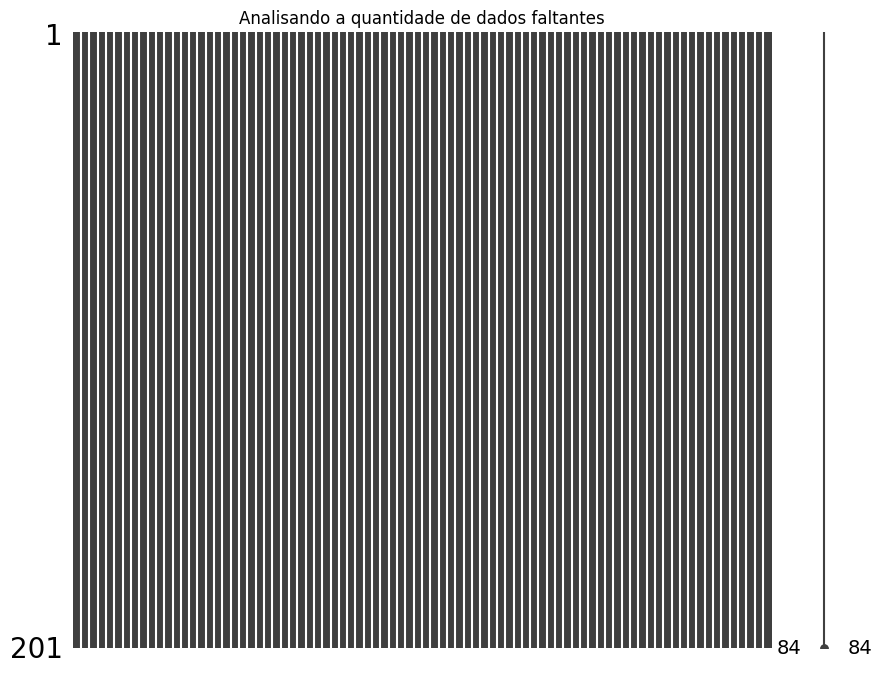

In [ ]:
msno.matrix(dataset, figsize=(10,8))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Não há dados faltantes, nulos. Portanto, não é necessário realizar tratamento desse aspecto.

A coluna com a maior média é 'feature_80' com média de 312.06


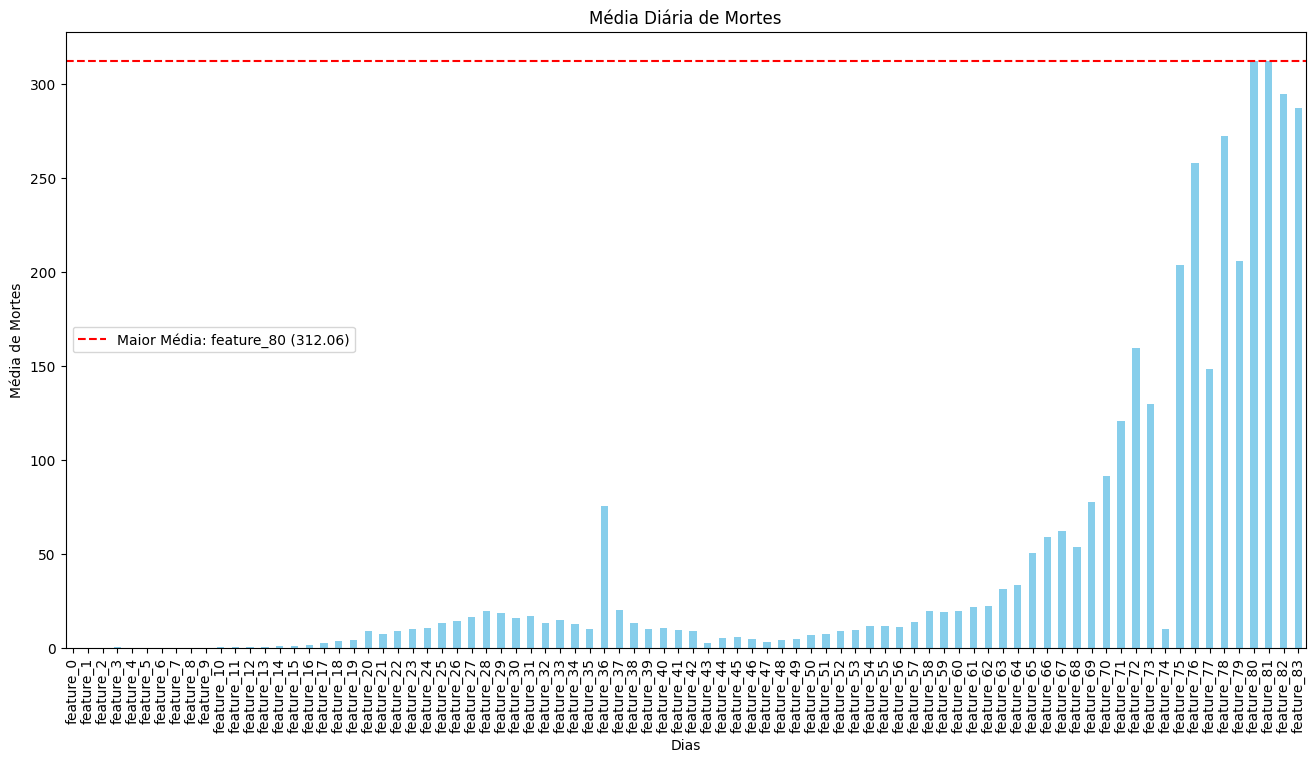

In [ ]:
# Média Diária de Mortes - GRáfico de Coluna Vertical

# Calculando a média das colunas
mean_values = dataset.mean()

# Encontrando a coluna com a maior média
max_column = mean_values.idxmax()
max_value = mean_values.max()

# Exibindo o resultado
print(f"A coluna com a maior média é '{max_column}' com média de {max_value:.2f}")

# Visualização
plt.figure(figsize=(16, 8))
mean_values.plot(kind='bar', color='skyblue')
plt.title("Média Diária de Mortes")
plt.xlabel("Dias")
plt.ylabel("Média de Mortes")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Média: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()

Nos 84 dias analisados, o valor médio máximo de mortes ocorreu no dia 81 (312.06 mortos)- 21 de março de 2020. Até o dia 15 de janeiro (feature_14), a média de mortes é representativamente baixa. É interessante ressaltar que essa é a media das mortes, analisando todos os países em um determinado dia. Portanto, posteriormente será analisada a mediana, pois a média pode ser muito influenciada por outliers (valores extremos) no conjunto de dados. Se um ou mais valores estiverem muito distantes um dos outros, eles podem distorcer a média e fazer com que ela não represente bem o "valor típico" dos dados.



A coluna (dia) com a maior mediana é 'feature_78' com mediana de 8.00


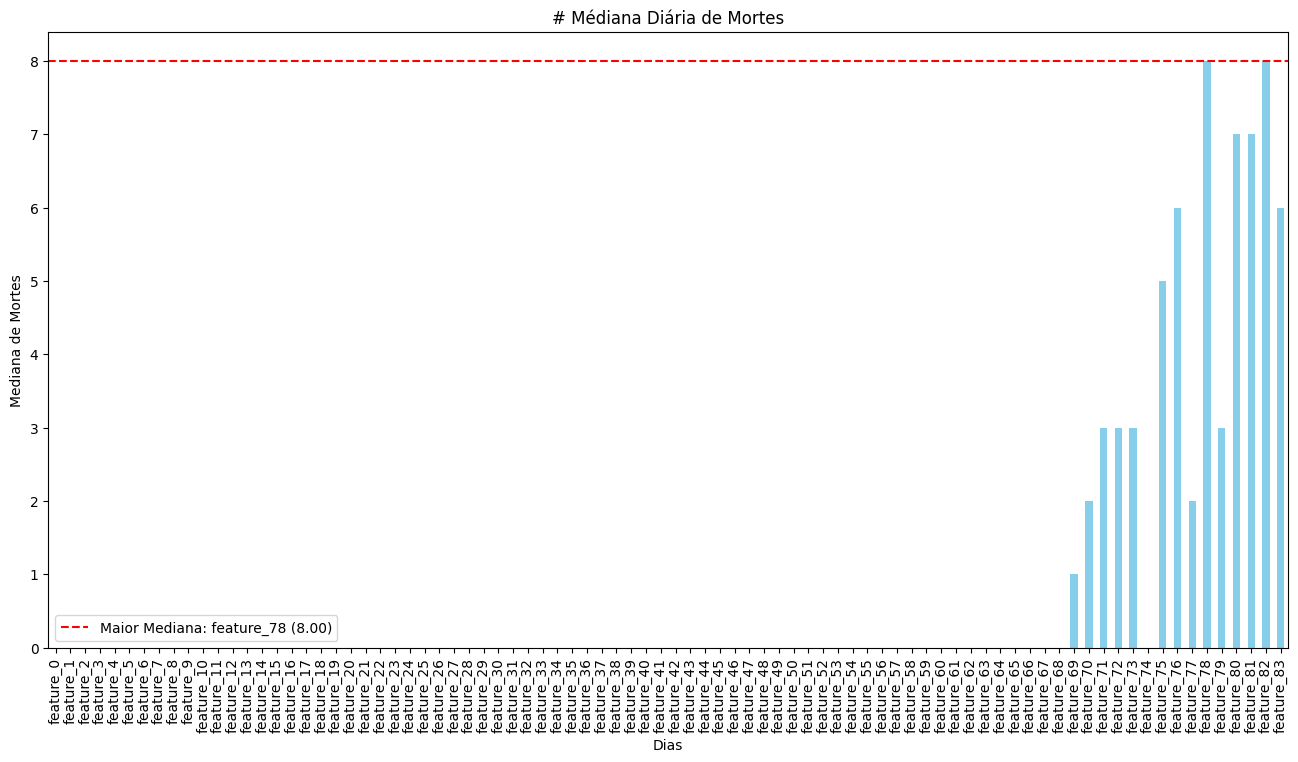

In [ ]:
# Mediana Diária de Mortes - Gráfico de Coluna Vertical
# Calculando a mediana das colunas
median_values = dataset.median()

# Encontrando a coluna - dia com a maior mediana
max_column = median_values.idxmax()
max_value = median_values.max()

# Exibindo o resultado
print(f"A coluna (dia) com a maior mediana é '{max_column}' com mediana de {max_value:.2f}")

# Visualização
plt.figure(figsize=(16, 8))
median_values.plot(kind='bar', color='skyblue')
plt.title("# Médiana Diária de Mortes")
plt.xlabel("Dias")
plt.ylabel("Mediana de Mortes")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Mediana: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()


A mediana é uma medida de tendência central que divide um conjunto de dados ordenado em duas partes iguais, de forma que 50% dos valores estão abaixo da mediana e 50% estão acima dela. O dia com a maior mediana é 'feature_78'(dia 79)-19 de março de 2020 com mediana de 8.00.

A coluna que representa o maior número total de mortes por dia é 'feature_80' com soma de 62724.00.


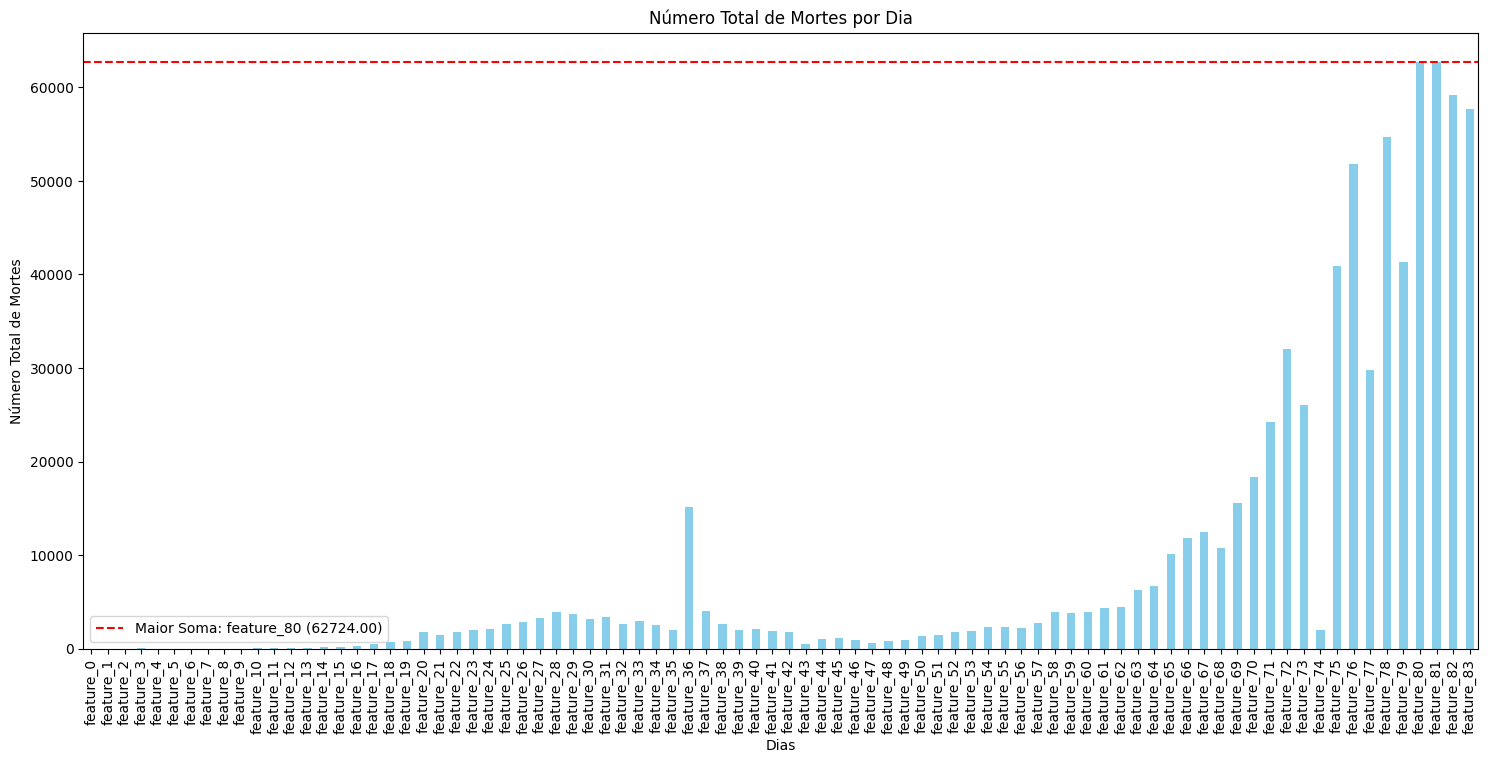

In [ ]:
# Número Total de Mortes por Dia- Gráfico Vertical
# Somando os valores de cada coluna
sum_values = dataset.sum()

# Encontrando a coluna com a maior soma total
max_column = sum_values.idxmax()
max_value = sum_values.max()

# Exibindo o resultado
print(f"A coluna que representa o maior número total de mortes por dia é '{max_column}' com soma de {max_value:.2f}.")

# Visualização
plt.figure(figsize=(18, 8))
sum_values.plot(kind='bar', color='skyblue')
plt.title("Número Total de Mortes por Dia")
plt.xlabel("Dias")
plt.ylabel("Número Total de Mortes")
plt.axhline(max_value, color='red', linestyle='--', label=f'Maior Soma: {max_column} ({max_value:.2f})')
plt.legend()
plt.show()


O dia com o maior número de mortes nos 201 países foi o octagésimo primeiro dia: 21 de março de 2020 ( feature_80), com 62.724 mortes.

O país com o maior número total de mortes é '35' com 140640.00 mortes.


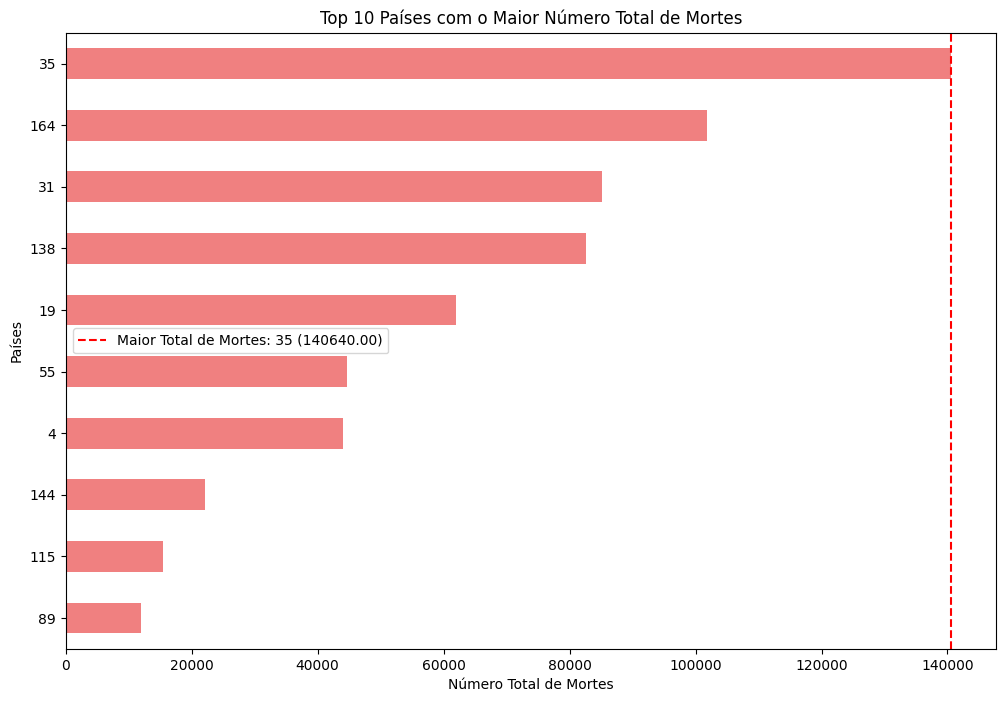

In [ ]:
# TOP 10 países com o maior número total de mortes - Gráfico Horizontal
# Somando os valores de cada linha (país)
total_deaths_per_country = dataset.sum(axis=1)

# Capturando os 10 países com o maior número de mortes
top_10_deaths = total_deaths_per_country.nlargest(10)

# Encontrando o país com o maior número total de mortes
#max_country = top_10_deaths.idxmax()
#max_deaths = top_10_deaths.max()

# Filtrando o dataset para pegar apenas os 10 países com mais mortes
top_10_dataset = dataset.loc[top_10_deaths.index]

# Exibindo o resultado
print(f"O país com o maior número total de mortes é '{max_country}' com {max_deaths:.2f} mortes.")

# Visualização
plt.figure(figsize=(12, 8))
top_10_deaths.sort_values(ascending=True).plot(kind='barh', color='lightcoral')  # Gráfico horizontal invertido
plt.title("Top 10 Países com o Maior Número Total de Mortes")
plt.xlabel("Número Total de Mortes")
plt.ylabel("Países")
plt.axvline(max_deaths, color='red', linestyle='--', label=f'Maior Total de Mortes: {max_country} ({max_deaths:.2f})')
plt.legend()
plt.show()


Esse gráfico representa os dez países com maior número de mortes. O país com o maior número de mortes foi o da linha 35, com 140640 mortos.

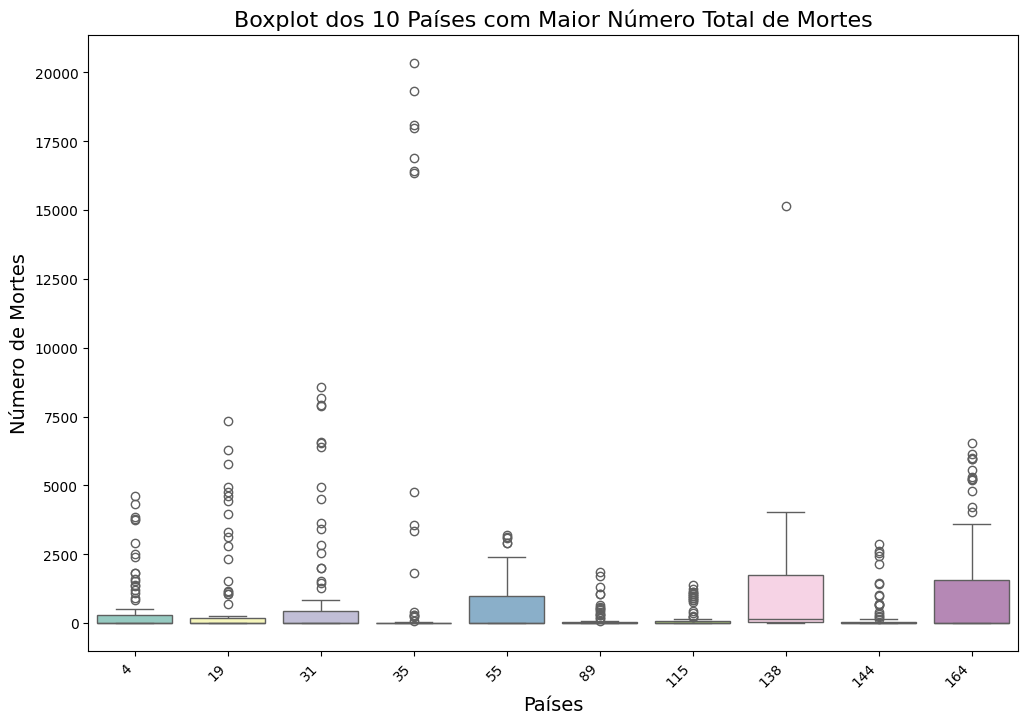

In [ ]:
# Boxplot dos 10 países com maior número de mortes
# Somando os valores de cada linha (país), para obter o número total de mortes por país
total_deaths_per_country = dataset.sum(axis=1)

# Pegando os 10 países com o maior número de mortes
top_10_deaths = total_deaths_per_country.nlargest(10)

# Filtrando o dataset para pegar apenas os 10 países com mais mortes
top_10_dataset = dataset.loc[top_10_deaths.index]

# Criando o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_dataset.T, palette="Set3")

# Configurações de título e rótulos
plt.title("Boxplot dos 10 Países com Maior Número Total de Mortes", fontsize=16)
plt.xlabel("Países", fontsize=14)
plt.ylabel("Número de Mortes", fontsize=14)

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.show()


O boxplot é uma ferramenta gráfica essencial para visualizar a distribuição de um conjunto de dados e os outliers. Quando comparado esse gráfico com o anterior, é possível concluir que o país com o maior número de mortes foi o país da linha 35 mas também é o país com o maior número de possíveis outliers. Portanto, seria importante fazer uma checagem  dos dados para confirmar sua precisão e consistência.

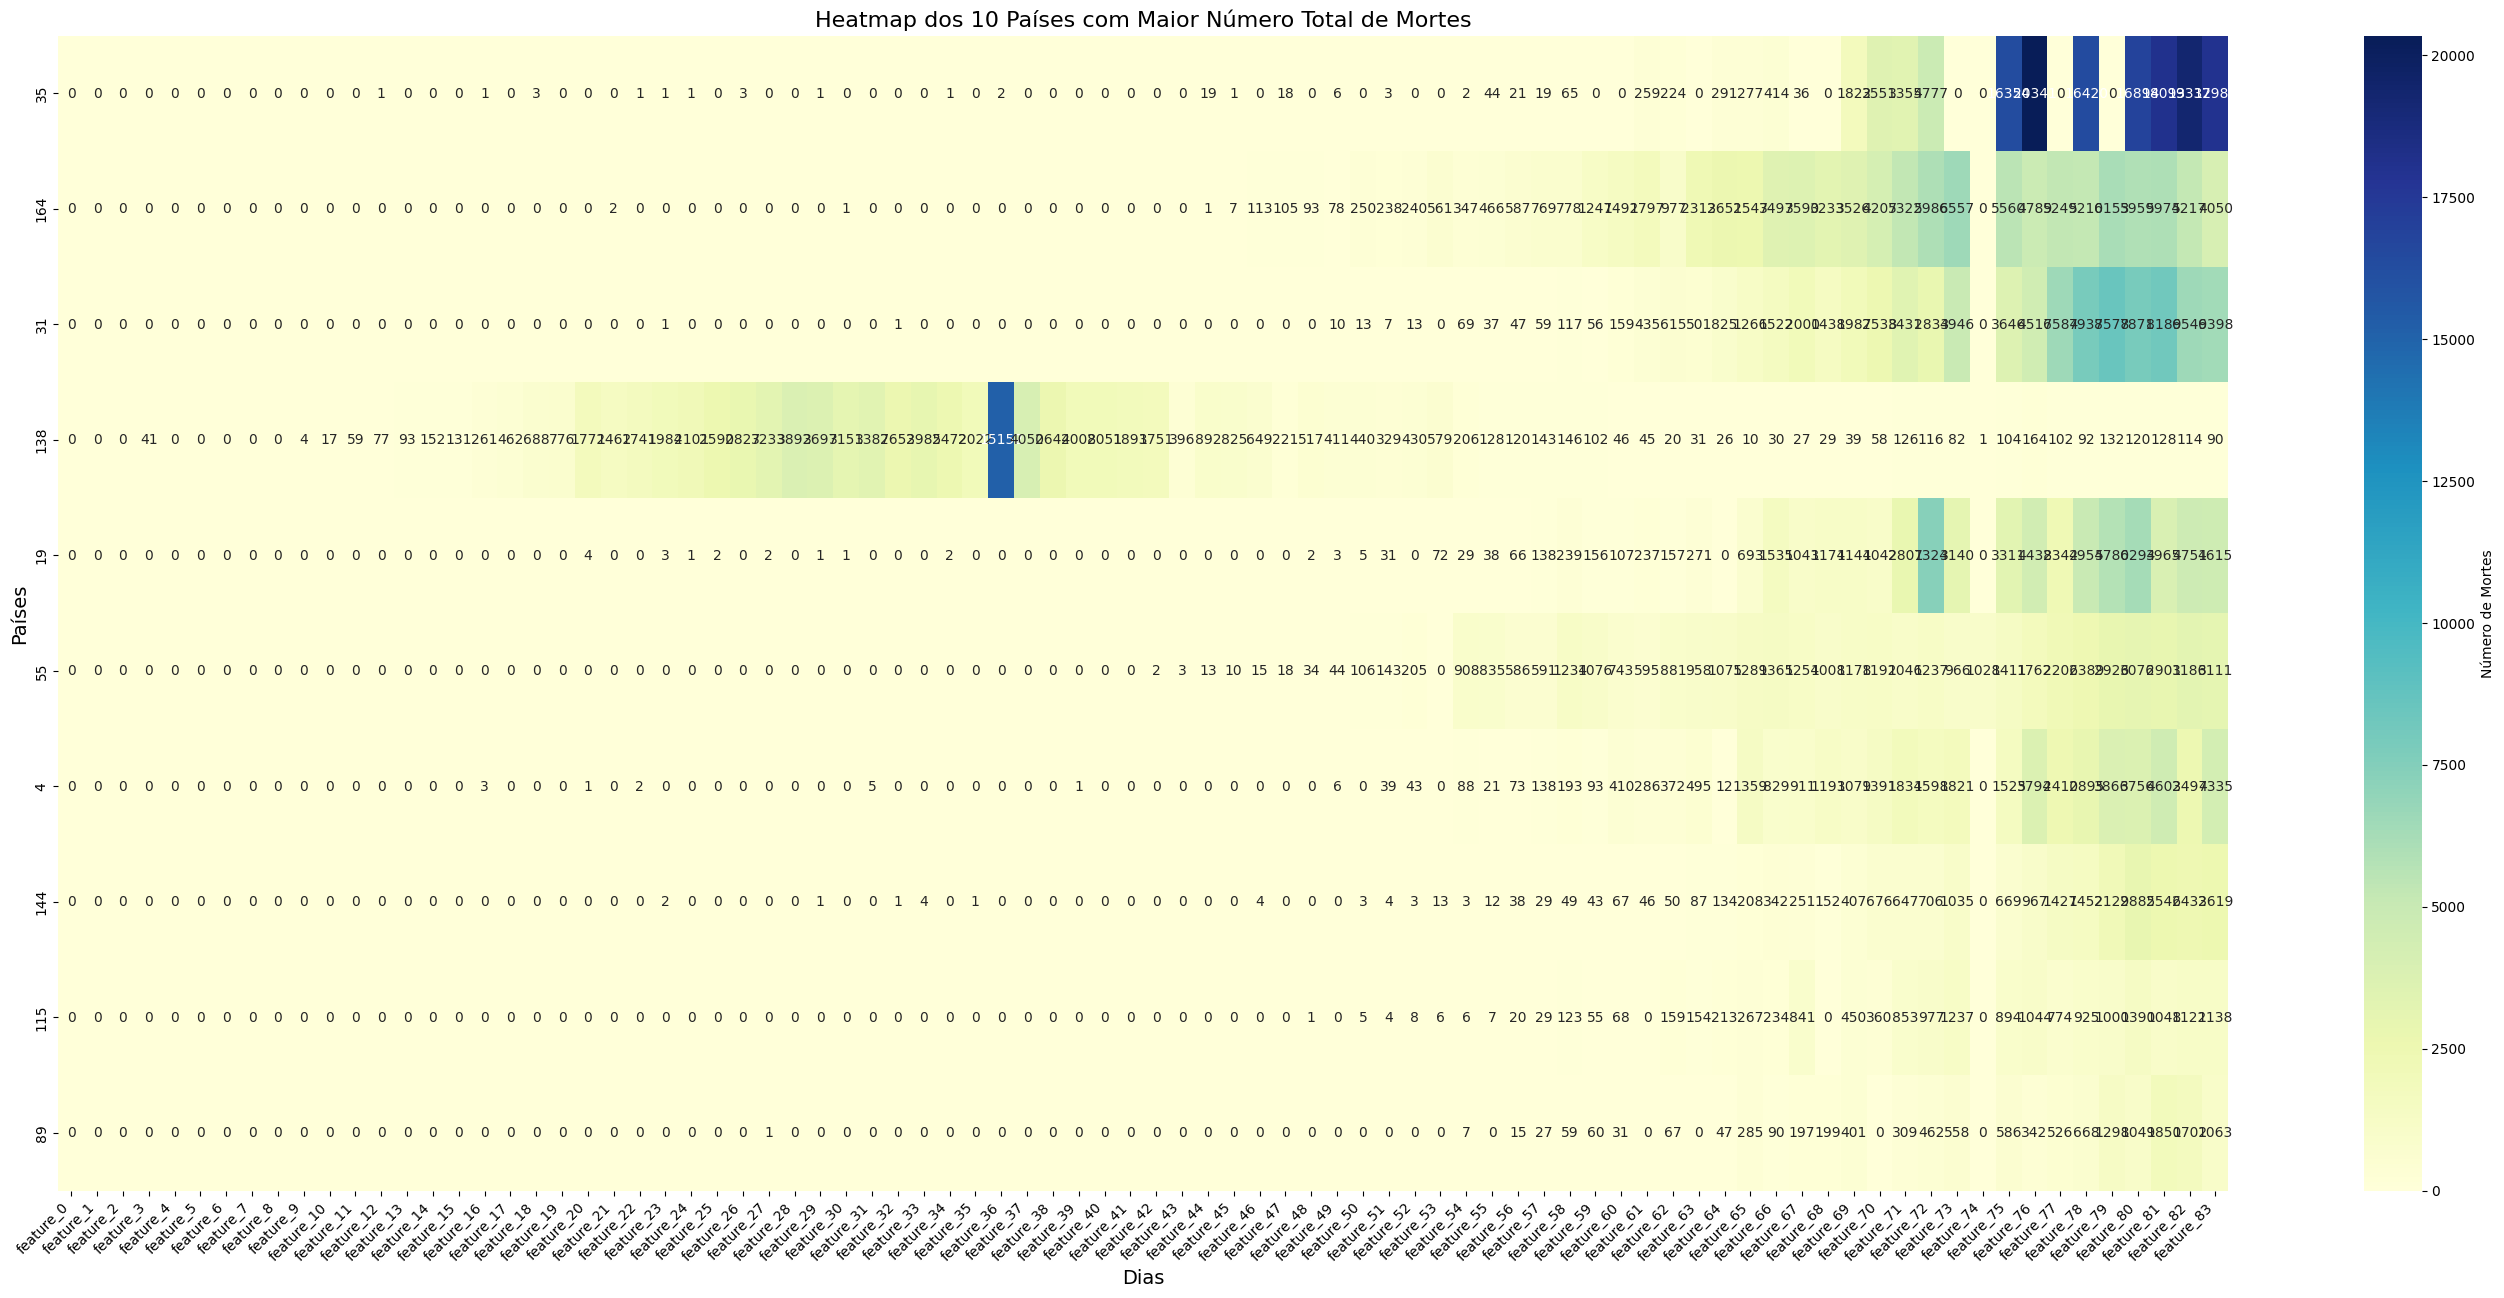

In [ ]:
# Heatmap dos 10 Países com Maior Número de Mortes
# Somando os valores de cada linha (país), para obter o número total de mortes por país
total_deaths_per_country = dataset.sum(axis=1)

# Reunindo os 10 países com o maior número de mortes
top_10_deaths = total_deaths_per_country.nlargest(10)

# Filtrando o dataset para pegar apenas os 10 países com mais mortes
top_10_dataset = dataset.loc[top_10_deaths.index]

# Criando o heatmap
plt.figure(figsize=(35, 15))
sns.heatmap(top_10_dataset, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Número de Mortes'})

# Configurações de título e rótulos
plt.title("Heatmap dos 10 Países com Maior Número Total de Mortes", fontsize=16)
plt.xlabel("Dias", fontsize=14)
plt.ylabel("Países", fontsize=14)

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.show()


O heatmap (mapa de calor) é uma representação gráfica de dados onde os seus valores são representados por diferentes intensidades de cores. Ele é útil para visualizar padrões e variações em grandes volumes de dados, permitindo uma análise rápida das relações entre as variáveis.

Ele foi importante para o dataset em comento porque permite analisar os picos de mortes (onde a cor é mais intensa), aumento gradual ou países com menor variação (onde a cor é mais uniforme ou fria). Novamente é possível constatar que o país da linha 35 teve um aumento brusco de mortes, mas agora é possível identificar que esses picos ocorreram no final do período analisado (últimos dez dias).

# **4.Redes Neurais Profundas**

X      - shape: [201 samples x 1 features x 84 timesteps]  type: memmap  dtype:float64  isnan: 0
y      - shape: (201,)  type: memmap  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [140, 61]  overlap: False


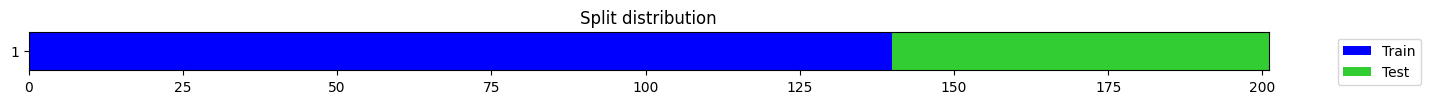

In [ ]:
#Formatação e Verificação dos dados para treinamento
check_data(X, y, splits)

In [ ]:
tfms = [None, [TSRegression()]] #pré-processamento para tarefas de regressão: None: x; aplicável a variável Y
batch_tfms = TSStandardize(by_sample=True, by_var=True) # transformação das séries temporais.
dls = get_ts_dls(X, y, splits, tfms=tfms, batch_tfms=batch_tfms, bs=32) #prepara e carrega os dados para treinamento e teste. #obs: define o tamanho do lote (batch size)
dls.one_batch() #processamento do primeiro lote de dados

(TSTensor(samples:32, vars:1, len:84, device=cpu, dtype=torch.float32),
 tensor([0.0000, 0.0000, 0.0397, 0.1731, 0.0000, 0.0347, 0.0000, 0.1063, 0.0000,
         0.0000, 0.0289, 0.0000, 0.0462, 0.0497, 0.0096, 0.0026, 0.0157, 0.0275,
         0.0321, 0.0444, 0.0559, 0.0046, 0.0105, 0.0408, 0.0368, 0.0196, 0.0098,
         0.0278, 0.0445, 0.0455, 0.0970, 0.1277]))

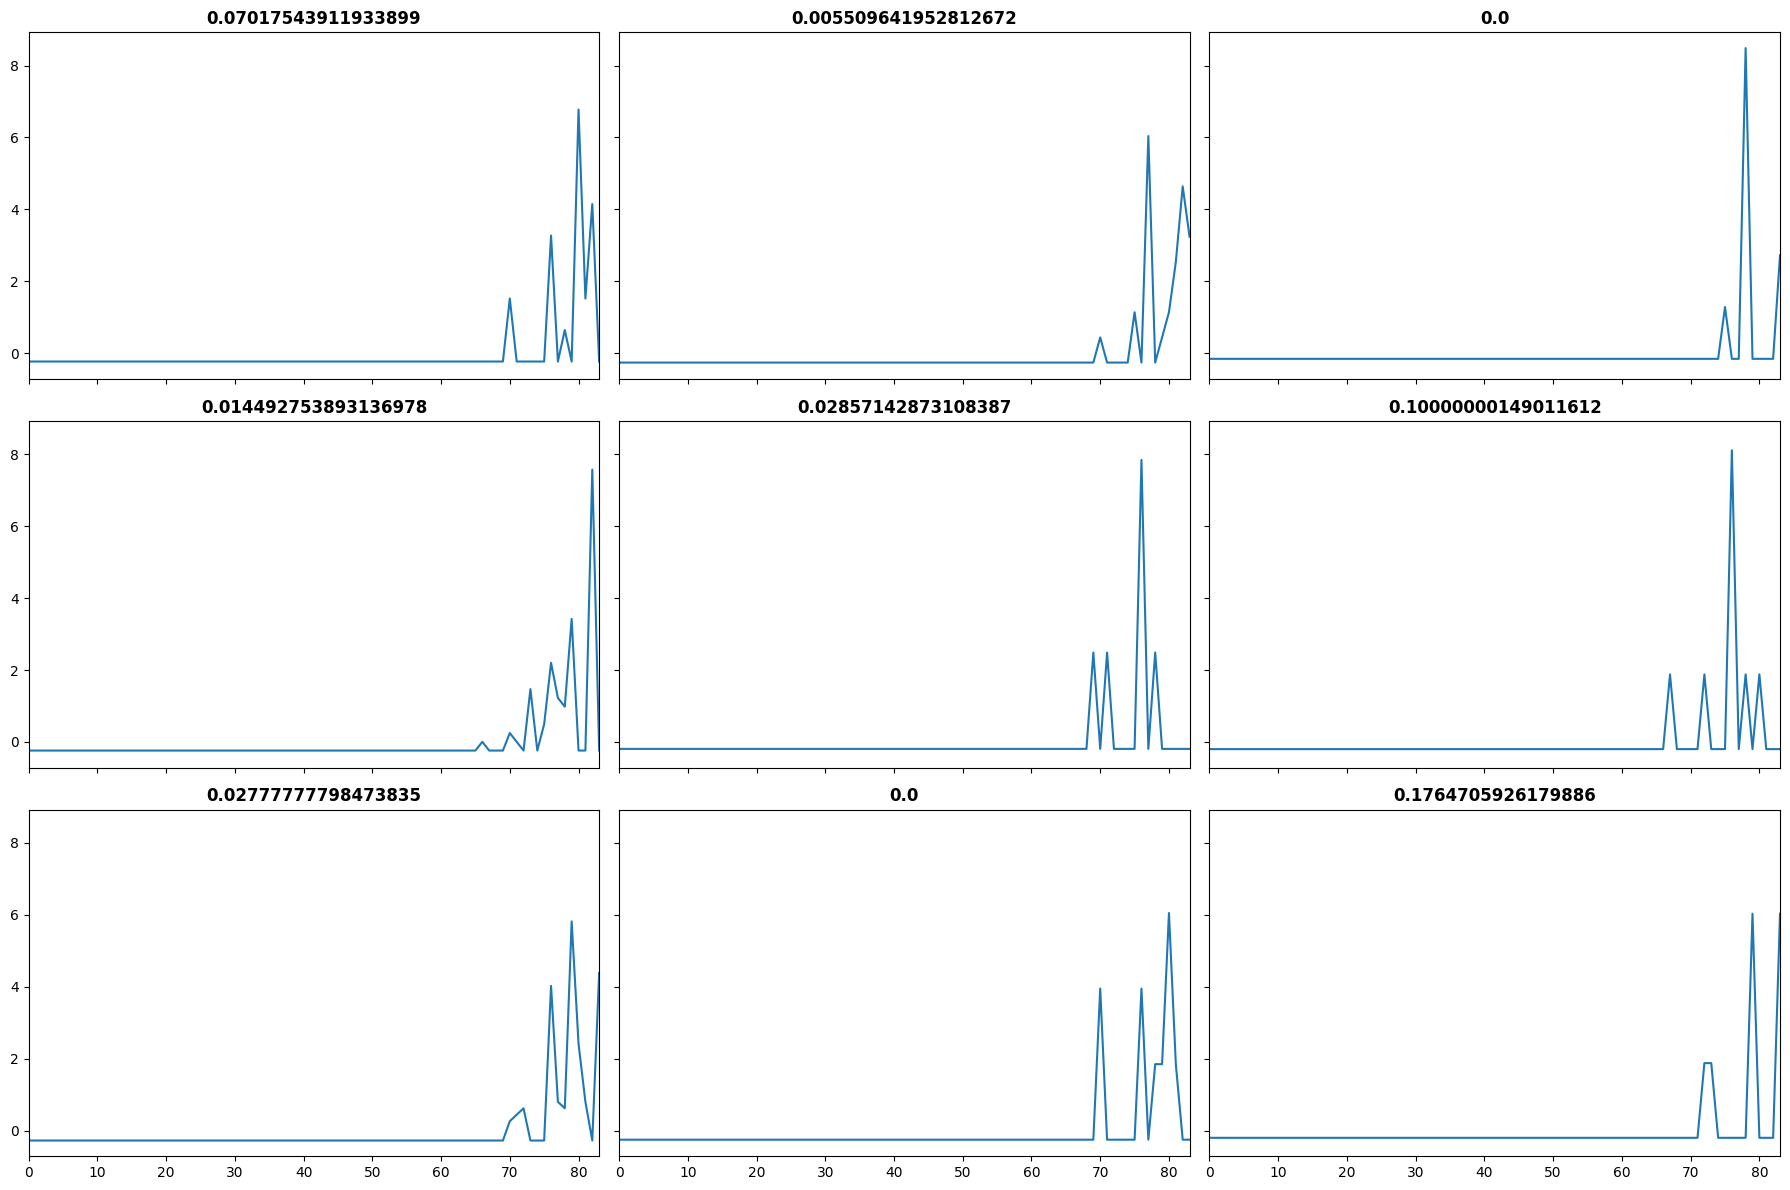

In [ ]:
dls.show_batch(sharey=True) # exibição de gráficos de todas as séries temporais do lote

SuggestedLRs(valley=0.0010000000474974513)

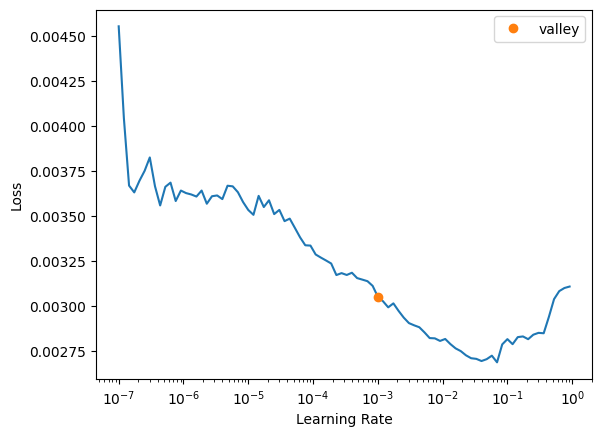

In [ ]:
 # busca pela taxa de aprendizado (learning rate) mais eficaz
learn = ts_learner(dls, LSTM, metrics=[mae, rmse], cbs=[ShowGraph()]) # função que cria e configura o modelo de aprendizado. Arquitetura: LSTM
learn.lr_find()

Também houve treinamento com a arquitetura InceptionTime mas LSTM apresentou melhores resultados no treinamento, validação, métricas de erros e predições.

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.003330,0.003419,0.046791,0.058469,00:00
1,0.002933,0.003168,0.047691,0.056285,00:00
2,0.002673,0.002665,0.038232,0.051628,00:00
3,0.002469,0.002062,0.036980,0.045415,00:00
4,0.002285,0.002001,0.031180,0.044735,00:00
5,0.002170,0.001794,0.032134,0.042359,00:00
6,0.002083,0.001775,0.032399,0.042136,00:00
7,0.001966,0.001831,0.030277,0.042795,00:00
8,0.001917,0.001909,0.029977,0.043688,00:00
9,0.001870,0.001914,0.029998,0.043754,00:00


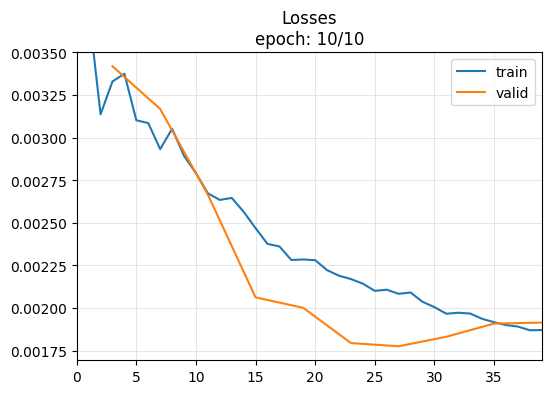

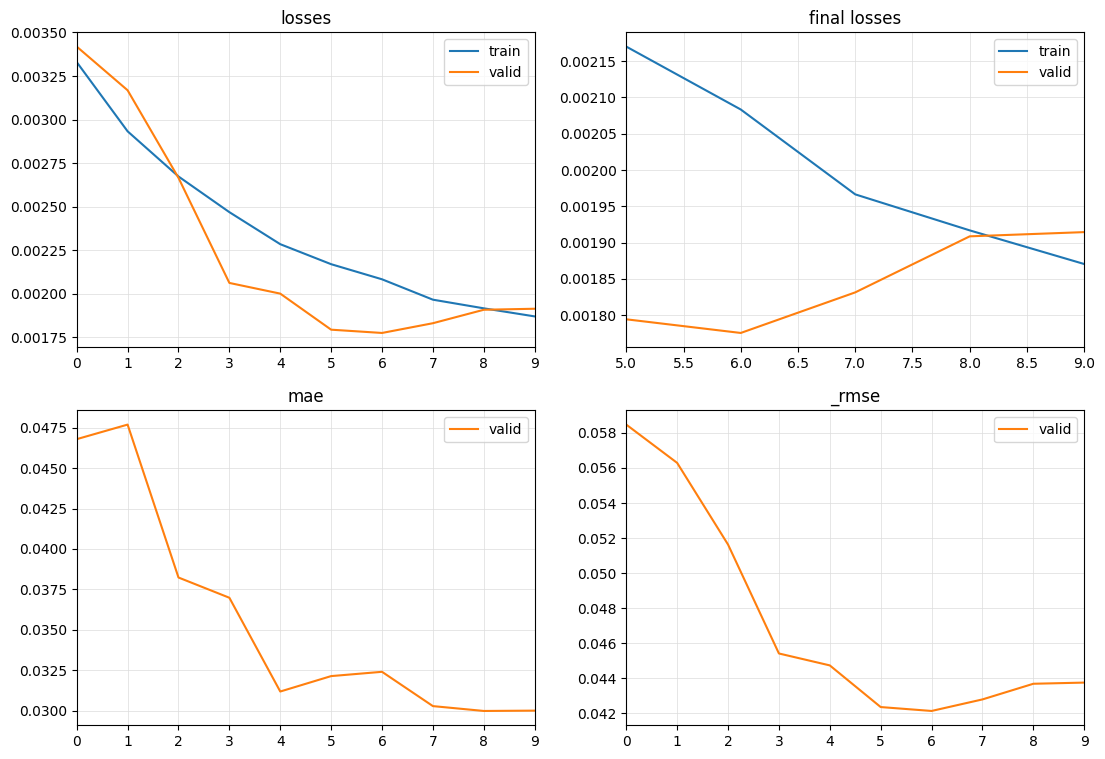

In [ ]:
# Treinando o modelo com o learning rate
learn.fit_one_cycle(10, lr_max=0.0010000000474974513)  #Train_loss - perda calculada durante o treinamento do modelo. # valid_loss - perda calculada com base em um conjunto de validação (verificar boa generalização)

O modelo apresenta um bom desempenho durante as épocas. Ele está se ajustando bem aos dados de treinamento e validação: perda de treinamento e a de validação estão diminuindo constantemente, indicando que o modelo está ajustando-se bem aos dados de treinamento e também está generalizando bem para a validação.

No final da validação houve um pequeno aumento, o que pode sugerir overfitting. Portanto, para futuros treinamentos/estudos, técnicas de regularização como Dropout poderiam ser aplicadas para buscar melhorar ainda mais o seu desempenho, além do monitoramento.

O erro absoluto (MAE) e o erro quadrático médio (RMSE) também estão diminuindo, o que indica que o modelo está se tornando mais preciso. Enfim, apresentou um bom desempenho.



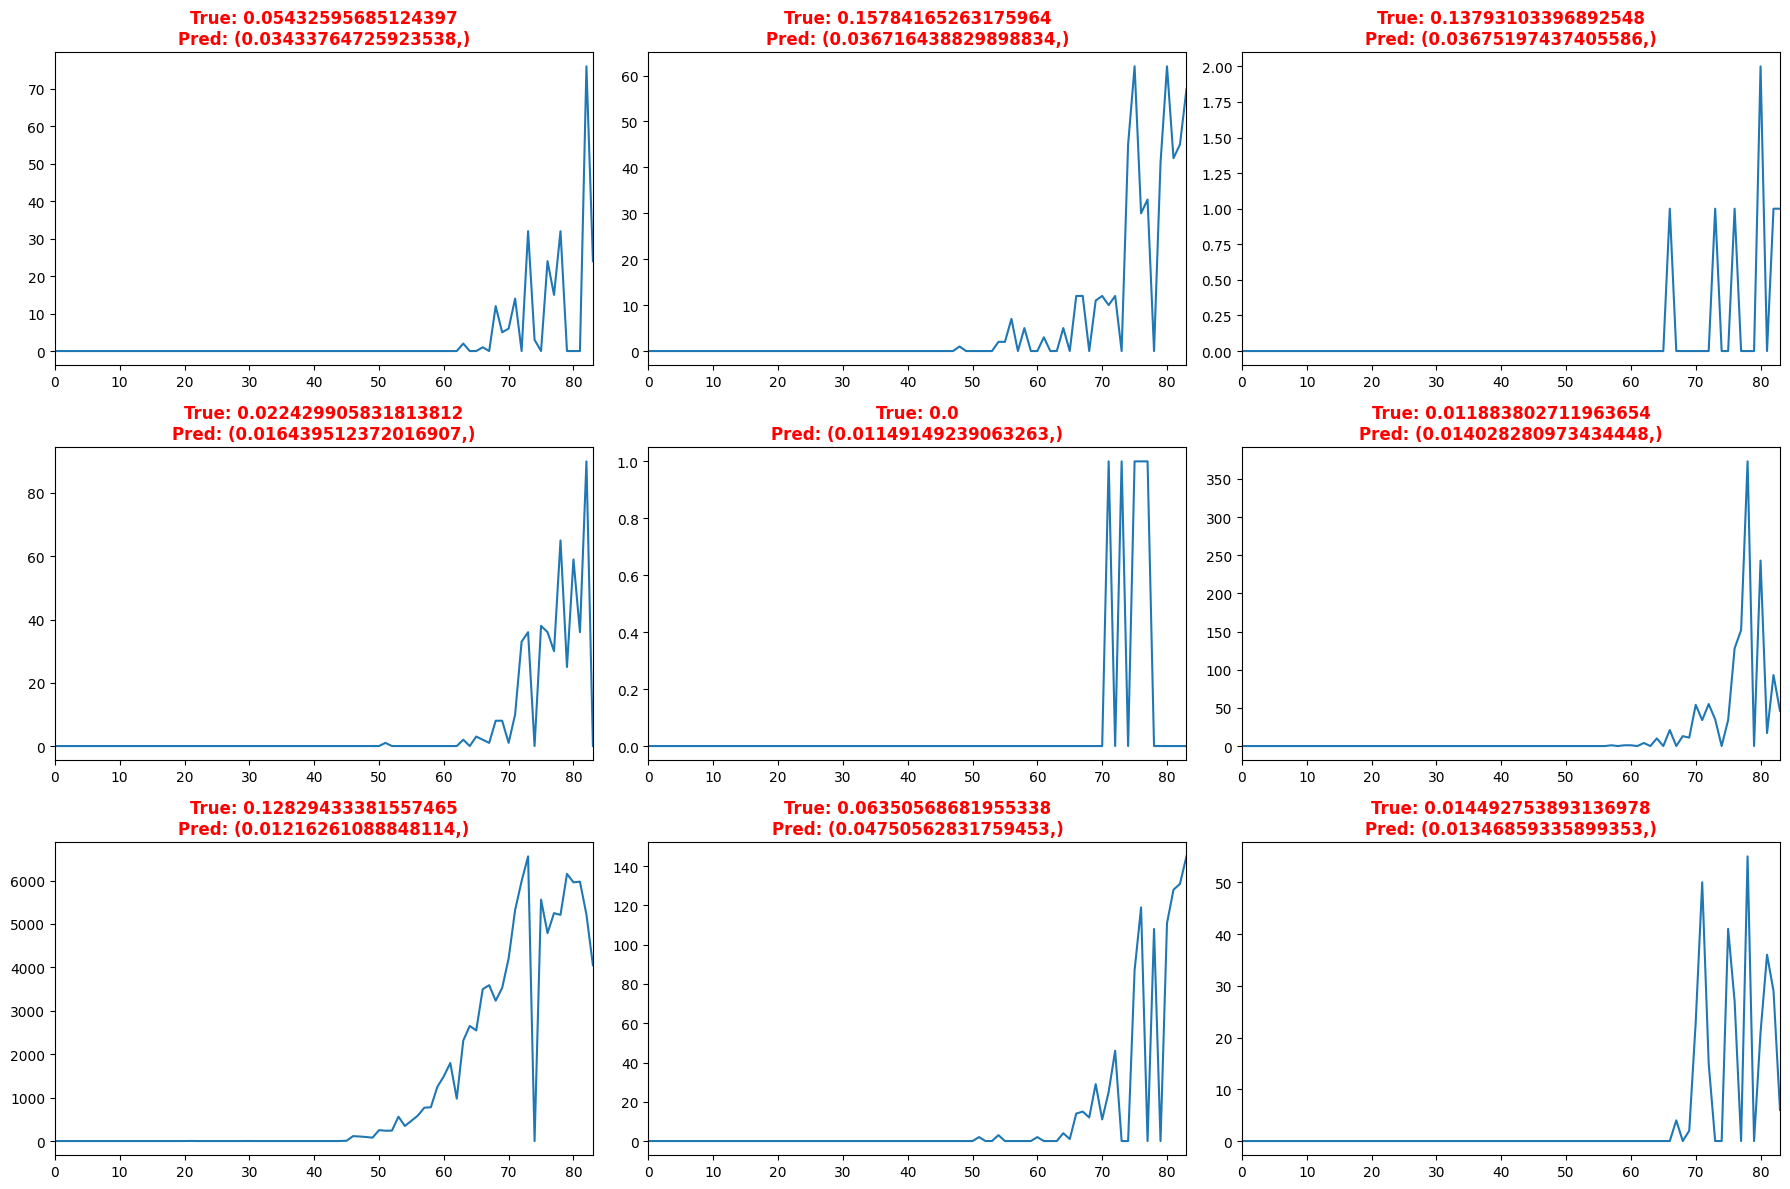

In [ ]:
learn.show_results() #exibe os resultados das previsões do modelo em comparação com os valores reais

#**5.Conclusões**

O presente trabalho utilizou o dataset 'Covid3Month', presente no tsai. Apesar de extensa procura sobre sua documentação, não foi encontrada. Entretanto, o trabalho acadêmico elaborado por Chang Wei Tan e outros autores, cujo link está acima, permitiu obter informações gerais sobre o dataset (criação autoral de tais estudantes da Universidade Monash). Portanto, devido a limitação da pesquisa, não foi possível identificar os países presentes nas linhas, bem como realizar uma análise exploratória mais profunda sobre o dados.

Ocorreu tratamento e análise dos dados, com a estruturação de algumas visualizações e conclusões. Também foi utilizado um modelo de aprendizagem profunda (arquitetura LSTM) para realizar o treinamento, validação, teste e predições. O modelo apresentou um bom desempenho durante as épocas, pois ocorreu um bom ajuste aos dados de treinamento e boa generalização na validação.




